In [1]:
train_time = 1
param_num = 450340
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*15 + comm_time*15
fedsgd_time_per_round = train_time*8*15 + comm_time*15*2
fedavg_time_per_round = train_time*8*15 + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]

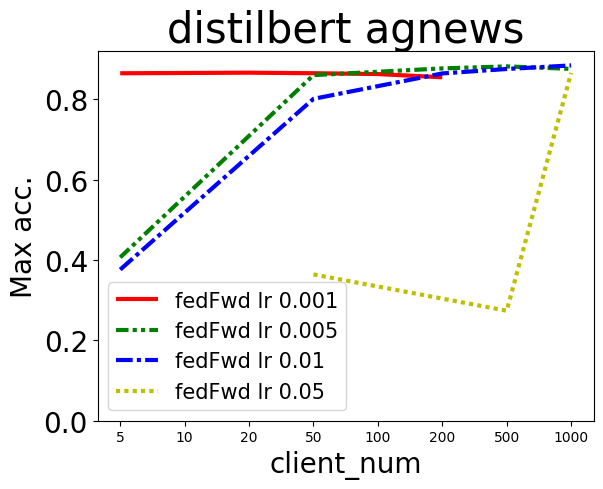

In [2]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = {"0.001":[5,20,50,100,200],"0.005":[5,50,200,500,1000],"0.01":[5,50,200,500,1000],"0.05":[50,500,1000]}
# client_num_list = [5,10,20,50,100]
method_list = ["fedFwd"]
dataset="agnews"
model_list = ["distilbert"]
learning_rate_list = ["0.001","0.005","0.01","0.05"]
eval_frequence = 10
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        for i,lr in enumerate(learning_rate_list):
            acc_lists = []
            for client_num in client_num_list[lr]:
                acc = []
                with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
                    log = f.readlines()
                    for l in log:
                        if "'acc':" in l:
                            acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                        # if len(acc)>200:
                        #     break
                # plt.plot([t*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)
                    acc_lists.append(max(acc))
            plt.plot([[5,10,20,50,100,200,500,1000].index(n) for n in client_num_list[lr]], acc_lists, linestyle=linestyle[i], color=colors[i],label=f"{method} lr {lr}",linewidth=lw)
        plt.xlabel("client_num",fontsize=20)
        plt.ylabel("Max acc.",fontsize=20)
        plt.xticks(range(8),[5,10,20,50,100,200,500,1000])
        # plt.xlim(0,3000)
        plt.yticks(size = 20)
        plt.ylim(0.0,0.92)
        plt.legend(fontsize=15)
        plt.title(f"distilbert agnews",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")

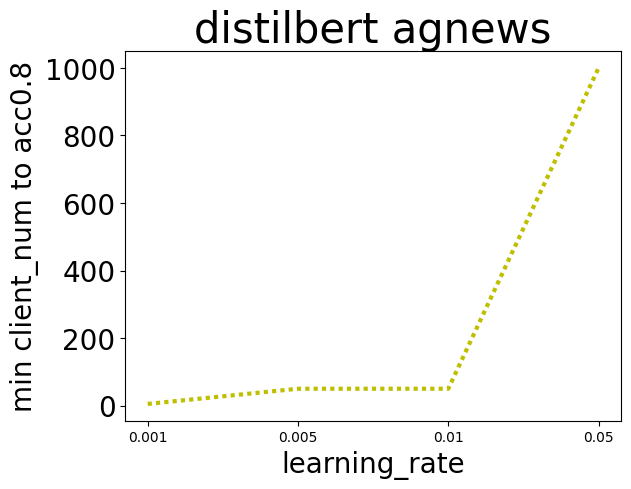

In [3]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = {"0.001":[5,20,50,100,200],"0.005":[5,50,200,500,1000],"0.01":[5,50,200,500,1000],"0.05":[50,500,1000]}
# client_num_list = [5,10,20,50,100]
method_list = ["fedFwd"]
dataset="agnews"
model_list = ["distilbert"]
learning_rate_list = ["0.001","0.005","0.01","0.05"]
eval_frequence = 10
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        min_client_num_list = []
        flag = False
        for i,lr in enumerate(learning_rate_list):
            for client_num in client_num_list[lr]:
                acc = []
                with open(f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}.log","r") as f:
                    log = f.readlines()
                    for l in log:
                        if "'acc':" in l:
                            acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                        # if len(acc)>200:
                        #     break
                # plt.plot([t*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)
                if max(acc) > 0.8:
                    min_client_num_list.append(client_num)
                    flag = True
                    break
            if not flag:
                min_client_num_list.append(200)
            flag = False
        plt.plot(range(len(learning_rate_list)), min_client_num_list, linestyle=linestyle[i], color=colors[i],label=f"{method} lr {lr}",linewidth=lw)
        plt.xlabel("learning_rate",fontsize=20)
        plt.ylabel("min client_num to acc0.8",fontsize=20)
        plt.xticks(range(4),learning_rate_list)
        # plt.xlim(0,3000)
        plt.yticks(size = 20)
        # plt.ylim(0.0,0.92)
        # plt.legend(fontsize=15)
        plt.title(f"distilbert agnews",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")

In [4]:
min_client_num_list

[5, 50, 50, 1000]